**Setting Up Library**

In [1]:
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# for checking the model accuracy
from sklearn import metrics 

#To plot the graph embedded in the notebook
%matplotlib inline

**Loading Dataset**

In [2]:
passenger_df = pd.read_csv('Airline.csv')
passenger_df

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


Checking Information about Data

In [3]:
passenger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [4]:
passenger_df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Data Preprocessing

**Droping Irrelevant Columns**

In [5]:
#Droping Unnamed Column and id Column
passenger_df = passenger_df.drop(passenger_df.iloc[:,[0,1]], axis = 1)
passenger_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


**Dropping Duplicate Rows**

In [6]:
#Droping duplicate rows and printing updated Data Frame
passenger_df.drop_duplicates(inplace= True)
passenger_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


**Finding Null Values**

In [7]:
#Finding the sum of null value in each column
passenger_df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [8]:
#Finding the percentage of null value in each column
passenger_df.isnull().sum()/len(passenger_df)

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

**Droping Rows with Null Value**

In [9]:
#Droping Null Value and loading Updated Dataset
passenger_df = passenger_df.dropna()
passenger_df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


**Current Shape and Columns of the Data Frame**

In [10]:
#Printing Shape and Column of Data Frame
print('Shape: ',passenger_df.shape)
print('Columns: ',passenger_df.columns)

Shape:  (103594, 23)
Columns:  Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


**Replacing String Value with Integer**

In [11]:
#Replacing String Value with integer and printing updated Dataset
passenger_df['Gender'] = passenger_df['Gender'].replace(['Female','Male'], [0,1])
passenger_df['Customer Type'] = passenger_df['Customer Type'].replace(['Loyal Customer','disloyal Customer'], [0,1])
passenger_df['Type of Travel'] = passenger_df['Type of Travel'].replace(['Business travel','Personal Travel'], [0,1])
passenger_df['Class'] = passenger_df['Class'].replace(['Business','Eco','Eco Plus'], [0,1,2])
passenger_df['satisfaction'] = passenger_df['satisfaction'].replace(['neutral or dissatisfied','satisfied'], [0,1])
passenger_df

/var/folders/j2/qq5bvshd55nf1d3wy465tf9w0000gp/T/ipykernel_5246/3967643202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passenger_df['Gender'] = passenger_df['Gender'].replace(['Female','Male'], [0,1])
/var/folders/j2/qq5bvshd55nf1d3wy465tf9w0000gp/T/ipykernel_5246/3967643202.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  passenger_df['Customer Type'] = passenger_df['Customer Type'].replace(['Loyal Customer','disloyal Customer'], [0,1])
/var/folders/j2/qq5bvshd55nf1d3wy465tf9w0000gp/T/ipykernel_

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,0,1,23,0,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
103900,1,0,49,0,0,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
103901,1,1,30,0,0,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
103902,0,1,22,0,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


# Exploratory Data Analysis

**Finding Size of Each Group**

In [12]:
#Printing each some important group size information
print(passenger_df.groupby('Gender').size(),"\n")
print(passenger_df.groupby('Customer Type').size(),"\n")
print(passenger_df.groupby('Type of Travel').size(),"\n")
print(passenger_df.groupby('Class').size(),"\n")
print(passenger_df.groupby('satisfaction').size(),"\n")

Gender
0    52576
1    51018
dtype: int64 

Customer Type
0    84662
1    18932
dtype: int64 

Type of Travel
0    71465
1    32129
dtype: int64 

Class
0    49533
1    46593
2     7468
dtype: int64 

satisfaction
0    58697
1    44897
dtype: int64 



**Count Plot**

<AxesSubplot: xlabel='satisfaction', ylabel='count'>

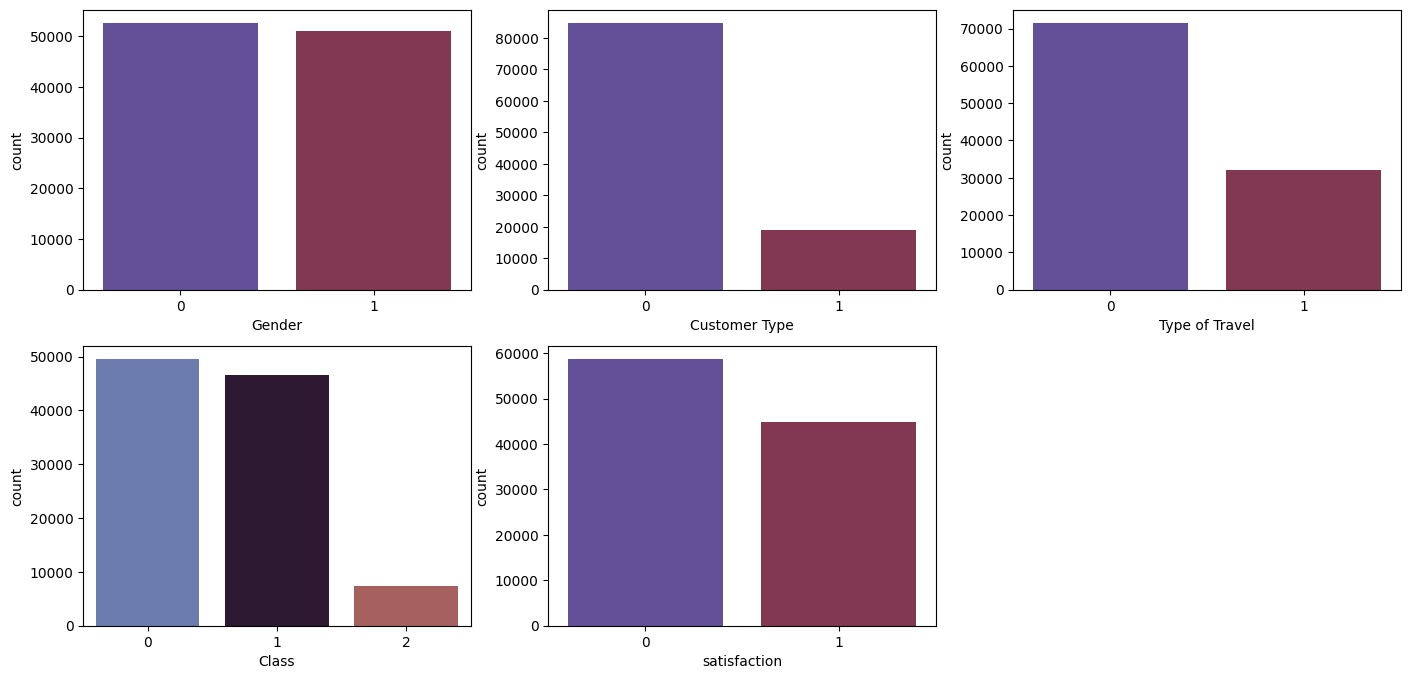

In [13]:
#Count Plot
plt.figure(figsize=(17,8))

plt.subplot(2, 3, 1)
sns.countplot(data=passenger_df,x='Gender',palette='twilight')
plt.subplot(2, 3, 2)
sns.countplot(data=passenger_df,x='Customer Type',palette='twilight')
plt.subplot(2, 3, 3)
sns.countplot(data=passenger_df,x='Type of Travel',palette='twilight')
plt.subplot(2, 3, 4)
sns.countplot(data=passenger_df,x='Class',palette='twilight')
plt.subplot(2, 3, 5)
sns.countplot(data=passenger_df,x='satisfaction',palette='twilight')

**Distribution Plot**

<Figure size 1700x800 with 0 Axes>

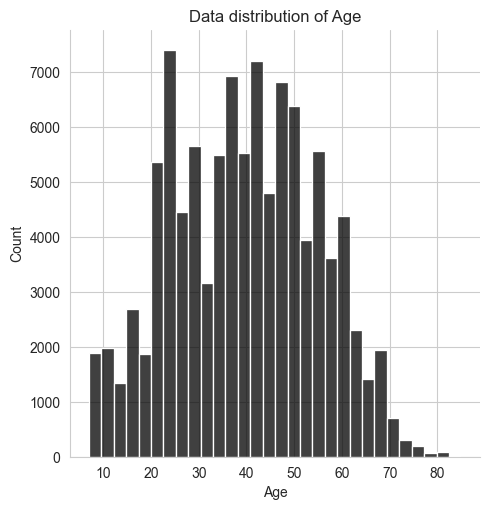

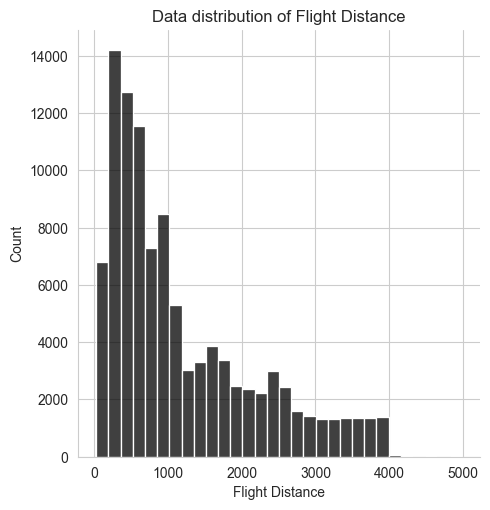

In [14]:
#Distribution Plot of Age and Flight Distance
sns.set_style ('whitegrid')
plt.figure(figsize=(17,8))

sns.displot(passenger_df['Age'], bins=30, color='black')
plt.title("Data distribution of Age");

sns.displot(passenger_df['Flight Distance'], bins=30, color='black')
plt.title("Data distribution of Flight Distance");


**Paraller Co-ordinates**

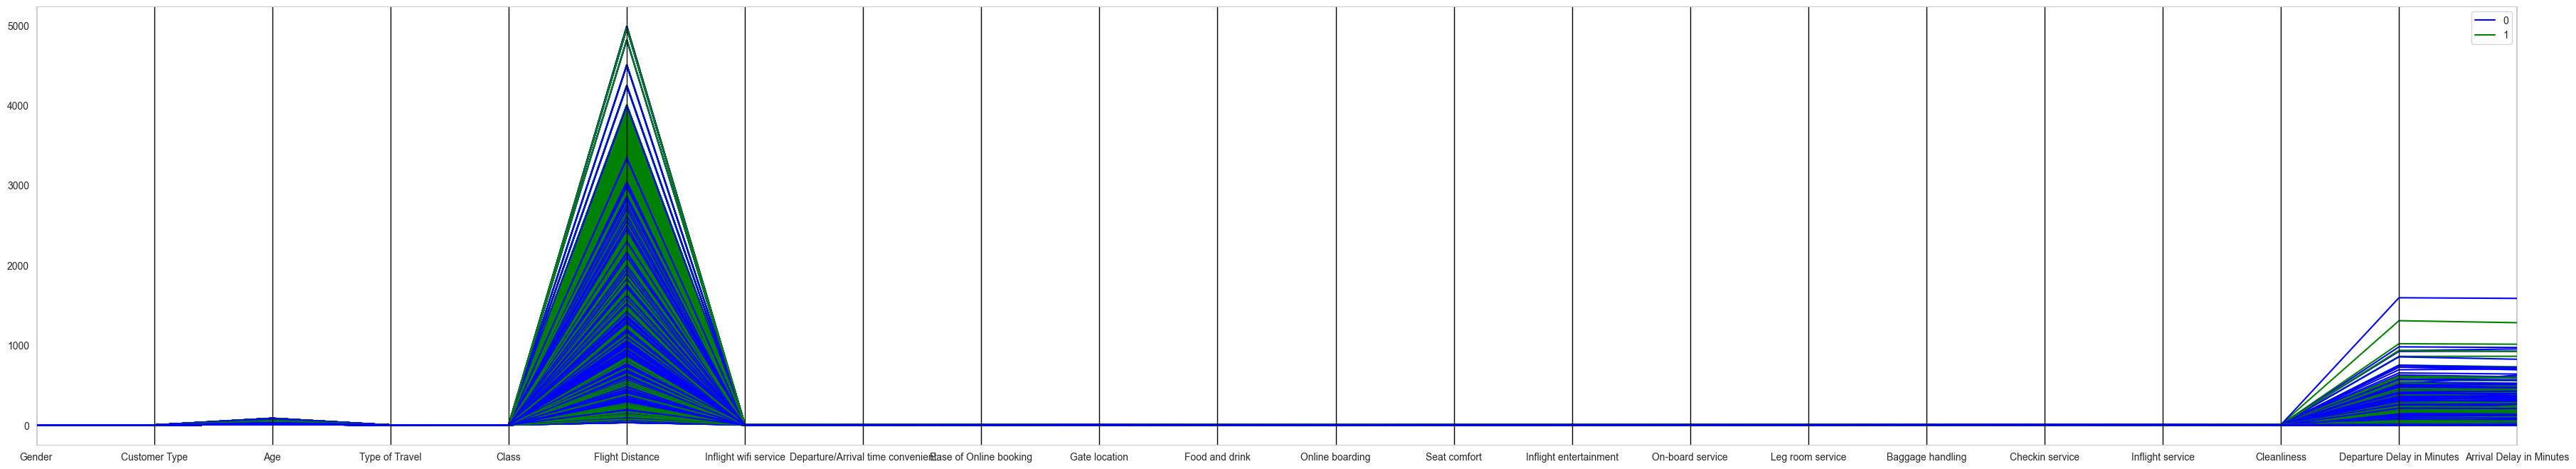

In [15]:
#Ploting Parallel cordinates
from pandas.plotting import parallel_coordinates
plt.figure(figsize = (45, 8))
parallel_coordinates(passenger_df, "satisfaction", color = ['blue', 'green']);

**correlation Matrix**

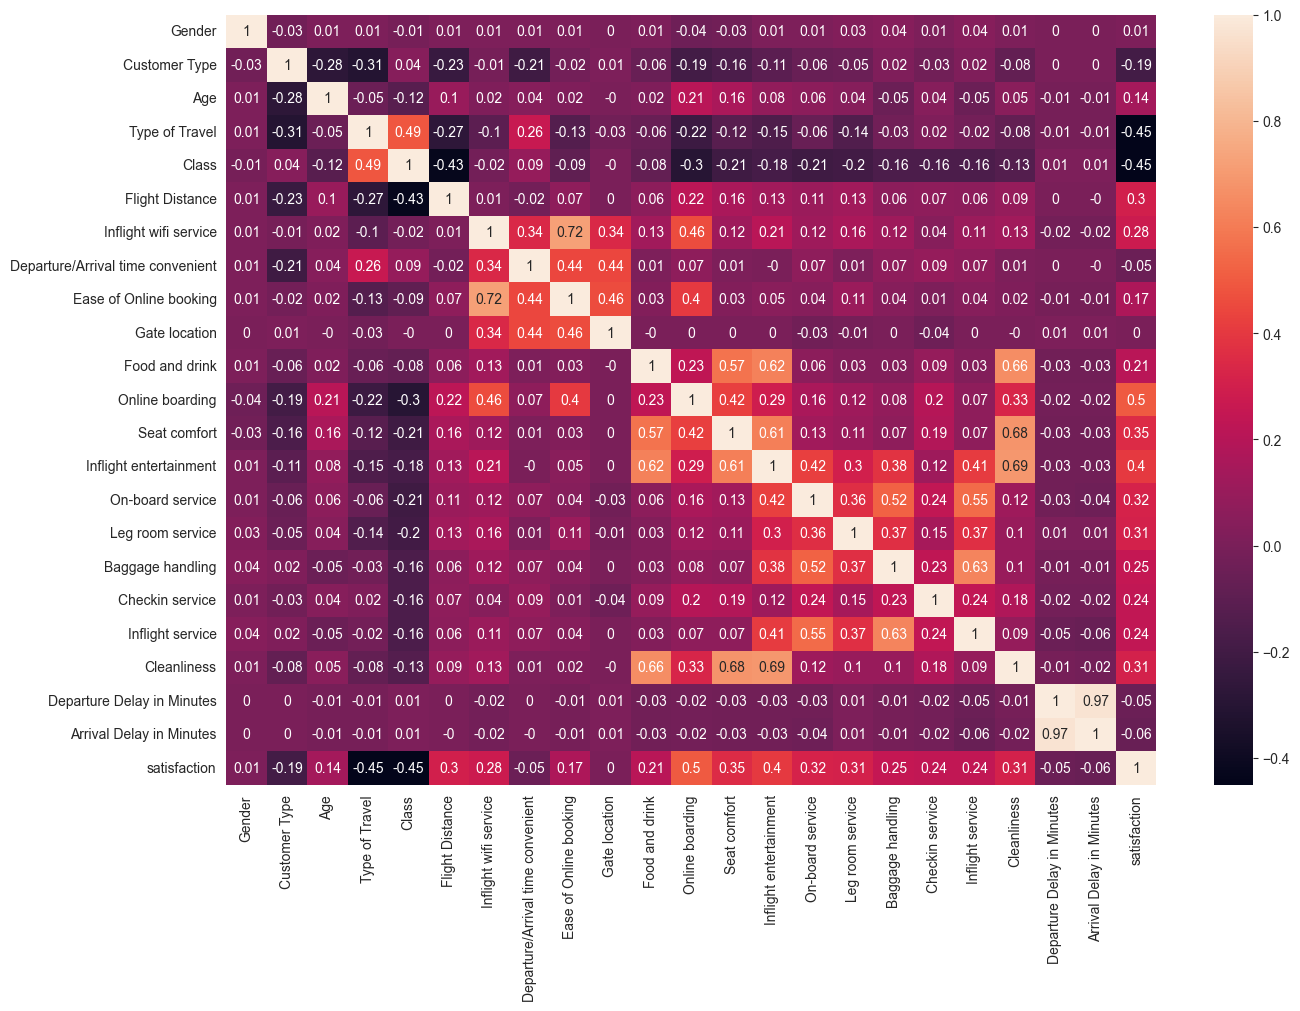

In [16]:
# corr() to calculate the correlation between variables
correlation_matrix = passenger_df.corr().round(2)
# changing the figure size
plt.figure(figsize = (15, 10))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True);

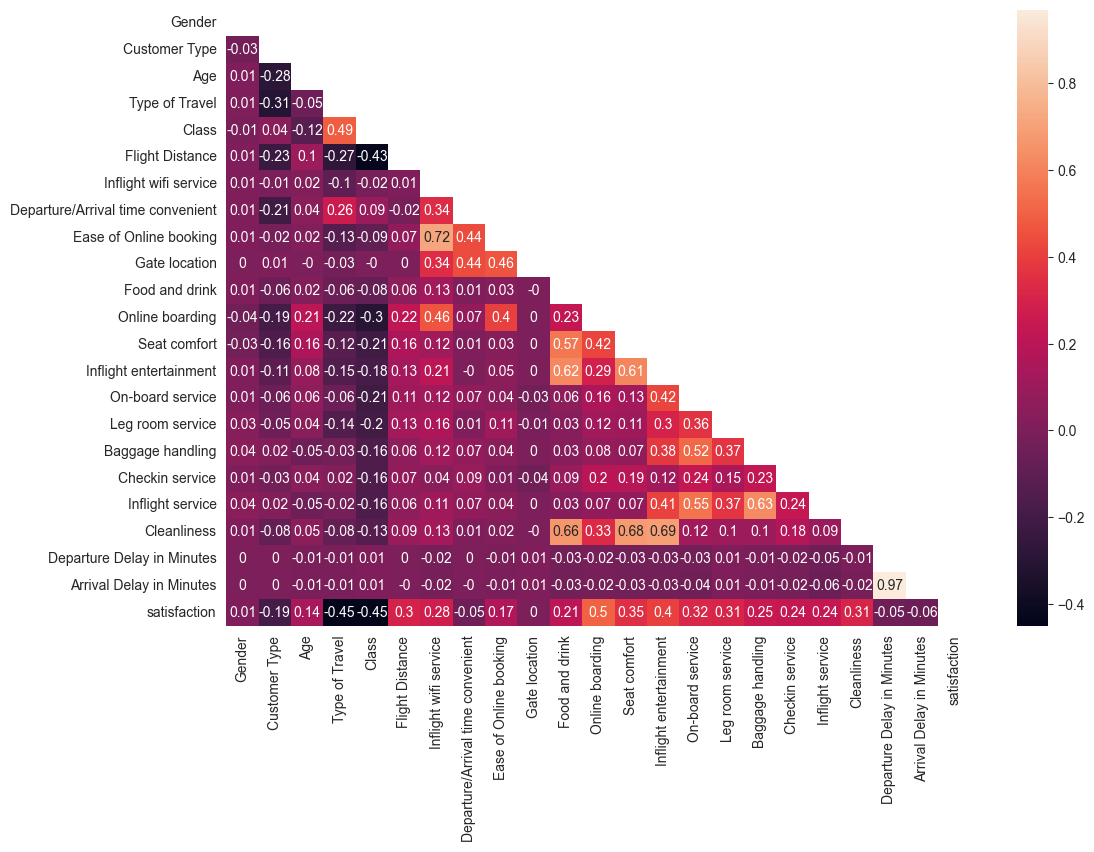

In [17]:
# corr() to calculate the correlation between variables
correlation_matrix = passenger_df.corr().round(2)
# Steps to remove redundant values
# Return a array filled with zeros
mask = np.zeros_like(correlation_matrix)
# Return the indices for the upper-triangle of array
mask[np.triu_indices_from(mask)] = True
# changing the figure size
plt.figure(figsize = (12, 8))
# "annot = True" to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);

# Model Development

**Create Features Matrix & Target Variable**

In [18]:
#Feature matrix

X = passenger_df[['Type of Travel','Inflight wifi service','Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 
                'Leg room service','Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']]
X



,Type of Travel,Inflight wifi service,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,1,3,3,5,5,4,3,4,4,5,5
1,0,3,3,1,1,1,5,3,1,4,1
2,0,2,5,5,5,4,3,4,4,4,5
3,0,2,2,2,2,2,5,3,1,4,2
4,0,3,5,5,3,3,4,4,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...
103899,0,2,2,2,2,3,1,4,2,3,2
103900,0,4,4,5,5,5,5,5,5,5,4
103901,0,1,1,5,4,3,2,4,5,5,4
103902,0,1,1,1,1,4,5,1,5,4,1


In [19]:
#Target Variable
y= passenger_df['satisfaction']
y

0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103594, dtype: int64

**Spliting the Dataset**

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10)
print("Feature train shape: ", X_train.shape)
print("Feature test shape: ", X_test.shape)
print("Target train shape: ", y_train.shape)
print("Target test shape: ", y_test.shape)

Feature train shape:  (72515, 11)
Feature test shape:  (31079, 11)
Target train shape:  (72515,)
Target test shape:  (31079,)


**Create Model: Support Vector Machine (SVM)**

In [21]:
# importing the necessary package to use the classification algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm

model_svm = svm.SVC() #select the algorithm
model_svm.fit(X_train, y_train) #train the model with the training dataset

y_prediction_svm = model_svm.predict(X_test) # pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print("----------------------------------")
print('The accuracy of the SVM is: {}'.format(score_svm))
print("----------------------------------")

# save the accuracy score
score = set()
score.add(('SVM', score_svm))

----------------------------------
The accuracy of the SVM is: 0.9354
----------------------------------


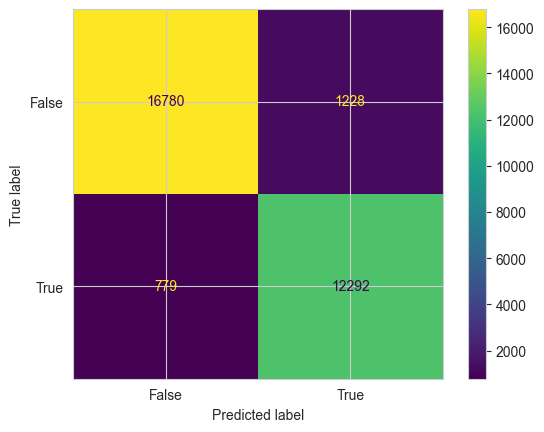

In [22]:
#Confusion Matrix for Support Vector Machine
confusion_matrix = metrics.confusion_matrix(y_prediction_svm, y_test)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

**Create Model: Decision Tree (DT)**

In [23]:
# importing the necessary package to use the classification algorithm
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train) #train the model with the training dataset
y_prediction_dt = model_dt.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print("---------------------------------")
print('The accuracy of the DT is: {}'.format(score_dt))
print("---------------------------------")
# save the accuracy score
score.add(('DT', score_dt))

---------------------------------
The accuracy of the DT is: 0.9316
---------------------------------


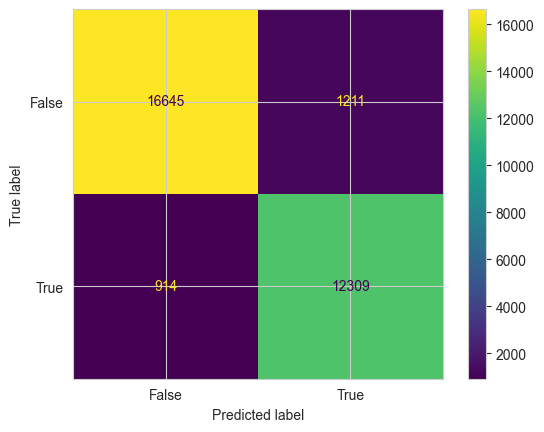

In [24]:
#Confusion Matrix for Decision Tree
confusion_matrix = metrics.confusion_matrix(y_prediction_dt, y_test)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

**Create Model: K Nearest Neighbours (KNN)**

In [25]:
# importing the necessary package to use the classification algorithm
from sklearn.neighbors import KNeighborsClassifier # for K nearest neighbours
#from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_knn = KNeighborsClassifier(n_neighbors=3) # 3 neighbours for putting the new data into a class
model_knn.fit(X_train, y_train) #train the model with the training dataset
y_prediction_knn = model_knn.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print("----------------------------------")
print('The accuracy of the KNN is: {}'.format(score_knn))
print("----------------------------------")
# save the accuracy score
score.add(('KNN', score_knn))

----------------------------------
The accuracy of the KNN is: 0.9236
----------------------------------


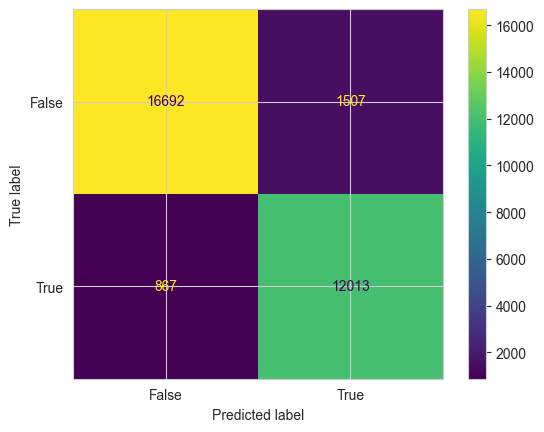

In [26]:
#Confusion Matrix for K Nearest Neighbour
confusion_matrix = metrics.confusion_matrix(y_prediction_knn, y_test)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

**Create Model: Logistic Regression**

In [27]:
# importing the necessary package to use the classification algorithm
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train) #train the model with the training dataset
y_prediction_lr = model_lr.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print("---------------------------------")
print('The accuracy of the LR is: {}'.format(score_lr))
print("---------------------------------")
# save the accuracy score
score.add(('LR', score_lr))

---------------------------------
The accuracy of the LR is: 0.8538
---------------------------------


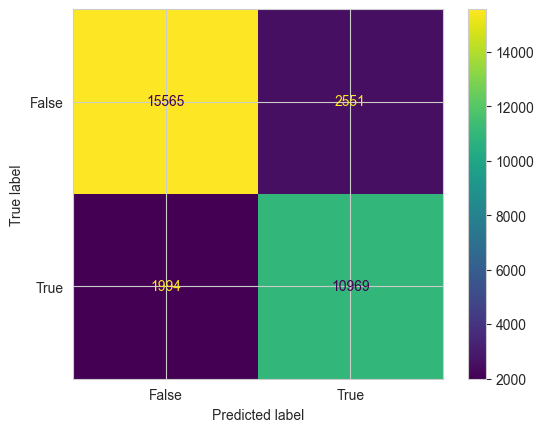

In [28]:
#Confusion Matrix for Logistic Regression
confusion_matrix = metrics.confusion_matrix(y_prediction_lr, y_test)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

**Create Model: Naive Bayes**

In [29]:
# importing the necessary package to use the classification algorithm
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train) #train the model with the training dataset
y_prediction_nb = model_nb.predict(X_test) #pass the testing data to the trained model
# checking the accuracy of the algorithm. 
# by comparing predicted output by the model and the actual output
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print("---------------------------------")
print('The accuracy of the NB is: {}'.format(score_nb))
print("---------------------------------")
# save the accuracy score
score.add(('NB', score_nb))

---------------------------------
The accuracy of the NB is: 0.8509
---------------------------------


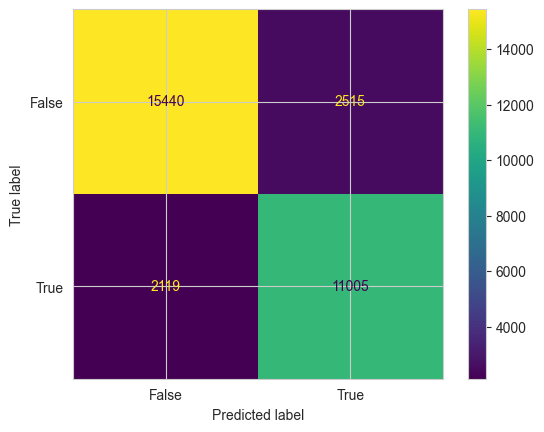

In [30]:
#Confusion Matrix for Naive Bayes Model
confusion_matrix = metrics.confusion_matrix(y_prediction_nb, y_test)
confusion_matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()

# **Discussion and Conclusion**

**Acurrecy of Five Different Machine Learning Model**

In [31]:
#Printing the accurecy of 5 different models from score set using for loop
print("The accuracy scores of different Models:")
print("----------------------------------------")

for s in score:
 print(s)

The accuracy scores of different Models:
----------------------------------------
('NB', 0.8509)
('DT', 0.9316)
('SVM', 0.9354)
('LR', 0.8538)
('KNN', 0.9236)


In [32]:
#Inserting the score into a dataset and arrenging it in assending order
accuracy_df = pd.DataFrame(score)
accuracy_df.rename(columns = {0:'Model',1:'Accuracy'}, inplace = True)
accuracy_df = accuracy_df.sort_values('Accuracy')
accuracy_df


,Model,Accuracy
0,NB,0.8509
3,LR,0.8538
4,KNN,0.9236
1,DT,0.9316
2,SVM,0.9354


Text(0.5, 1.0, 'Model Vs Accuracy')

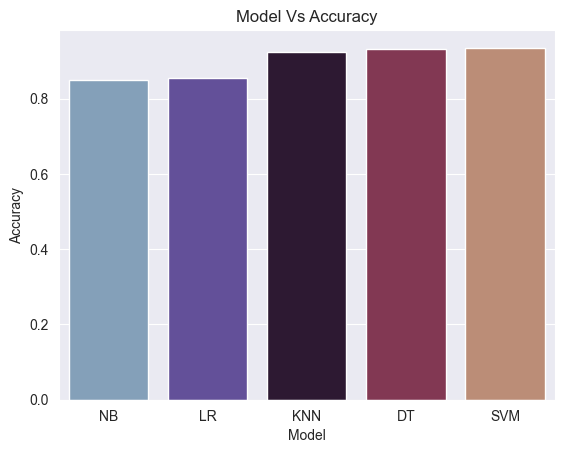

In [33]:
#Ploting model vs accuracy barplot
sns.set_style ('darkgrid')
sns.barplot(data= accuracy_df,x='Model',y='Accuracy',palette='twilight')
plt.title('Model Vs Accuracy')